In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV , train_test_split

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
data = pd.read_excel("data.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
data.dropna(inplace = True)

In [4]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"]).dt.month
data["Journey_day"] = pd.to_datetime(data["Date_of_Journey"]).dt.day

data["Dep_Time_hr"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_Time_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

data["Arrival_Time_hr"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_Time_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [5]:
data.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)

In [6]:
print(data.Airline.value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [7]:
#mapping

stop = {
    "non-stop":0,
    "1 stop":1,
    "2 stops":2,
    "3 stops":3,
    "4 stops":4
}

data.loc[: , "Total_Stops"] = data["Total_Stops"].map(stop)

In [8]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,2h 25m,0,3873,6,24,9,0,11,25
6,Jet Airways,Banglore,New Delhi,15h 30m,1,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,21h 5m,1,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,25h 30m,1,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,7h 50m,1,8625,5,27,11,25,19,15


In [9]:
#change of duration into hr and min
#data

duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [10]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [11]:
data.drop(["Duration"] , axis =1 , inplace =True)

In [12]:
# As Airline, Source, Destination are Nominal Categorical data we will perform OneHotEncoding
Airline = data[["Airline"]]
Source = data[["Source"]]
Destination = data[["Destination"]]

Airline = pd.get_dummies(Airline, drop_first= True)
Source = pd.get_dummies(Source, drop_first= True)
Destination = pd.get_dummies(Destination, drop_first = True)

In [13]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data = pd.concat([data, Airline, Source, Destination], axis = 1)
data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [14]:
data.head()

,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [15]:
x = data.drop(["Price"] , axis =1)
y = data.Price
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 100 , test_size = 0.3)

In [16]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)

In [17]:
reg_rf.score(x_train, y_train)

0.9541516007808433

In [18]:
reg_rf.score(x_test, y_test)

0.808505857591928

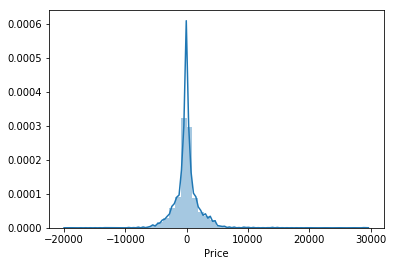

In [19]:
sns.distplot(y_test-y_pred)
plt.show()

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1221.6862221329632
MSE: 4009987.0180835086
RMSE: 2002.4951980175904


In [21]:
metrics.r2_score(y_test, y_pred)

0.808505857591928

In [23]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [24]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [26]:
prediction = rf_random.predict(x_test)

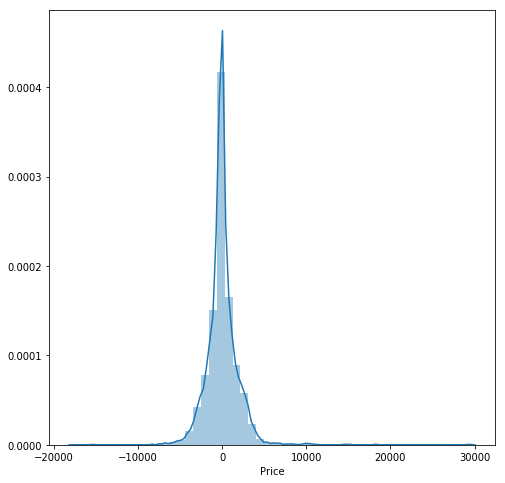

In [27]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1186.217021407453
MSE: 3607050.399031565
RMSE: 1899.2236306005582


In [29]:
## Save the model to reuse it again

import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

y_prediction = forest.predict(x_test)

metrics.r2_score(y_test, y_prediction)

0.8277478157235123